# Online Retail EDA — Professional Analysis
**Comprehensive Exploratory Data Analysis**

**Dataset:** Online Retail (UCI) — transactional data (Dec 2010 - Dec 2011)

---

## Executive summary
- Objective: Explore sales, product performance, customer behavior and returns to produce actionable business insights.
- Key findings (short): UK drives volume not AOV; no clear holiday spike; top SKUs and high-return SKUs identified; RFM segmentation shows VIPs and high-value at-risk customers.

---


## Questions to answer (asked before analysis)

1. What are the overall revenue, orders, and customer counts?
2. What are the monthly revenue trends and seasonality? Any holiday spikes?
3. Which countries contribute the most revenue?
4. Which products are top by revenue and top by quantity?
5. Which products have the highest return rates?
6. Who are the top customers and what is the RFM segmentation?
7. Do UK customers have a higher average order value than others?
8. Are returns concentrated in specific SKUs or customers?
9. What data quality issues exist and how should they be handled?

---


## Environment & How to run

- Python 3.8+ recommended
- Install dependencies: `pip install -r requirements.txt`
- Place dataset at `data/Online Retail.xlsx`
- Run the notebook cells top-to-bottom to reproduce the analysis

---


## 1) Imports and settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,6)
sns.set(style='whitegrid')
np.random.seed(42)


## 2) Load data

In [2]:
DATA_PATH = 'data/Online Retail.xlsx'

df = pd.read_excel(DATA_PATH, engine='openpyxl')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 3) Data overview: shape, dtypes, missing values

In [3]:
print('Shape:', df.shape)
display(df.info())
display(df.describe(include='all').T)

mv = pd.concat([df.isnull().sum(), (df.isnull().mean()*100)], axis=1)
mv.columns = ['missing_count','missing_percent']
display(mv.sort_values('missing_count', ascending=False))

Shape: (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


None

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,541909.0,25900.0,573585.0,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,NaN,NaN,NaN,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,missing_count,missing_percent
CustomerID,135080,24.926694
Description,1454,0.268311
StockCode,0,0.000000
InvoiceNo,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


## 4) Clean column names & parse datetimes

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['invoicedate'] = pd.to_datetime(df['invoicedate'], dayfirst=True, errors='coerce')
display(df.head(3))
display(df.columns)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

## 5) Identify cancellations and basic noise

In [5]:
df['is_cancel'] = df['invoiceno'].astype(str).str.startswith('C')
print(df['is_cancel'].value_counts())

is_cancel
False    532621
True       9288
Name: count, dtype: int64


## 6) Create sales dataset (remove cancellations)

In [6]:
df_sales = df[~df['is_cancel']].copy()
print('Sales dataset shape after removing cancellations:', df_sales.shape)
print('Duplicate rows:', df_sales.duplicated().sum())

Sales dataset shape after removing cancellations: (532621, 9)
Duplicate rows: 5231


## 7) Feature engineering: total_price and date parts

In [7]:
df_sales['total_price'] = df_sales['quantity'] * df_sales['unitprice']
df_sales['year'] = df_sales['invoicedate'].dt.year
df_sales['month'] = df_sales['invoicedate'].dt.month
df_sales['month_name'] = df_sales['invoicedate'].dt.strftime('%b')
df_sales['day'] = df_sales['invoicedate'].dt.day
df_sales['hour'] = df_sales['invoicedate'].dt.hour

display(df_sales[['invoiceno','stockcode','description','quantity','unitprice','total_price','invoicedate']].head())

,invoiceno,stockcode,description,quantity,unitprice,total_price,invoicedate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01 08:26:00


## 8) Split positive sales and returns

In [8]:
df_sales_pos = df_sales[df_sales['quantity'] > 0].copy()
df_returns = df_sales[df_sales['quantity'] < 0].copy()
print('Positive sales rows:', df_sales_pos.shape)
print('Return rows:', df_returns.shape)

Positive sales rows: (531285, 15)
Return rows: (1336, 15)


## 9) Handling missing CustomerID

We keep two datasets:
- df_sales_all (all positive sales) — for revenue trends, product & country analysis
- df_sales_cust (rows with customerid) — for customer-level RFM and segmentation

In [9]:
df_sales_all = df_sales_pos.copy()
df_sales_cust = df_sales_pos.dropna(subset=['customerid']).copy()
print('Rows with customerid:', df_sales_cust.shape)
print('Rows without customerid (guests):', df_sales_all.shape[0] - df_sales_cust.shape[0])

Rows with customerid: (397924, 15)
Rows without customerid (guests): 133361


## 10) High-level aggregates

In [10]:
total_revenue = df_sales_all['total_price'].sum()
total_orders = df_sales_all['invoiceno'].nunique()
total_customers = df_sales_all['customerid'].nunique()
print(f"Total revenue: {total_revenue:,.2f}")
print('Total unique orders:', total_orders)
print('Total unique customers (including NaNs):', total_customers)

Total revenue: 10,644,560.42
Total unique orders: 20728
Total unique customers (including NaNs): 4339


## 11) Monthly revenue trend (time-series)

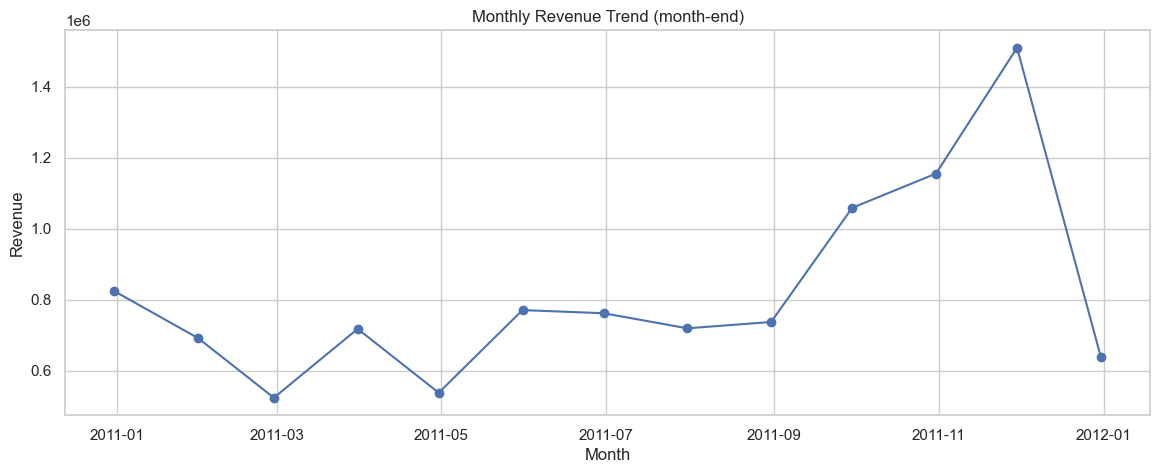

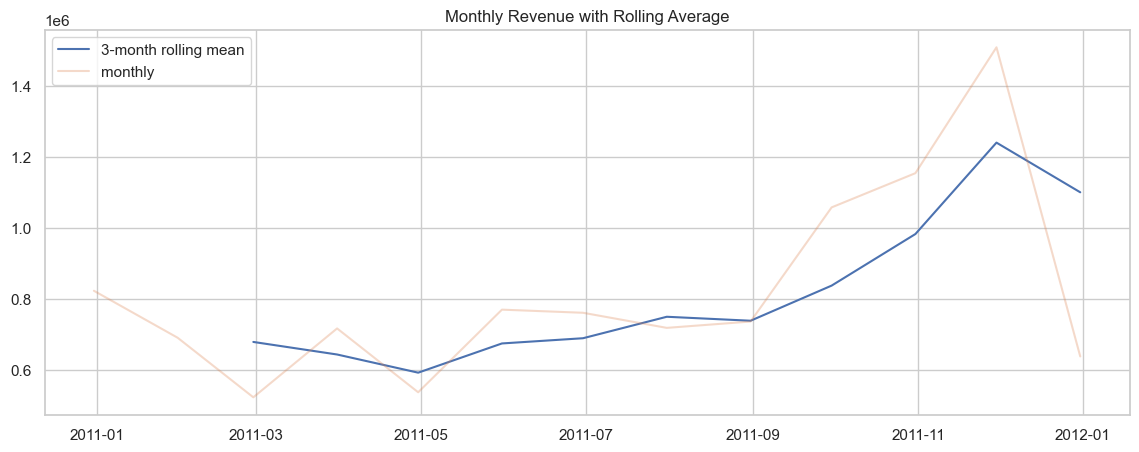

In [11]:
ts = df_sales_all.set_index('invoicedate')['total_price'].resample('ME').sum()
plt.figure(figsize=(14,5))
plt.plot(ts, marker='o')
plt.title('Monthly Revenue Trend (month-end)')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.show()

plt.figure(figsize=(14,5))
plt.plot(ts.rolling(3).mean(), label='3-month rolling mean')
plt.plot(ts, alpha=0.3, label='monthly')
plt.legend()
plt.title('Monthly Revenue with Rolling Average')
plt.show()

## 12) Country-level revenue analysis

country
United Kingdom    9003097.964
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Australia          138521.310
Spain               61577.110
Switzerland         57089.900
Belgium             41196.340
Sweden              38378.330
Japan               37416.370
Norway              36165.440
Portugal            33747.100
Finland             22546.080
Singapore           21279.290
Name: total_price, dtype: float64

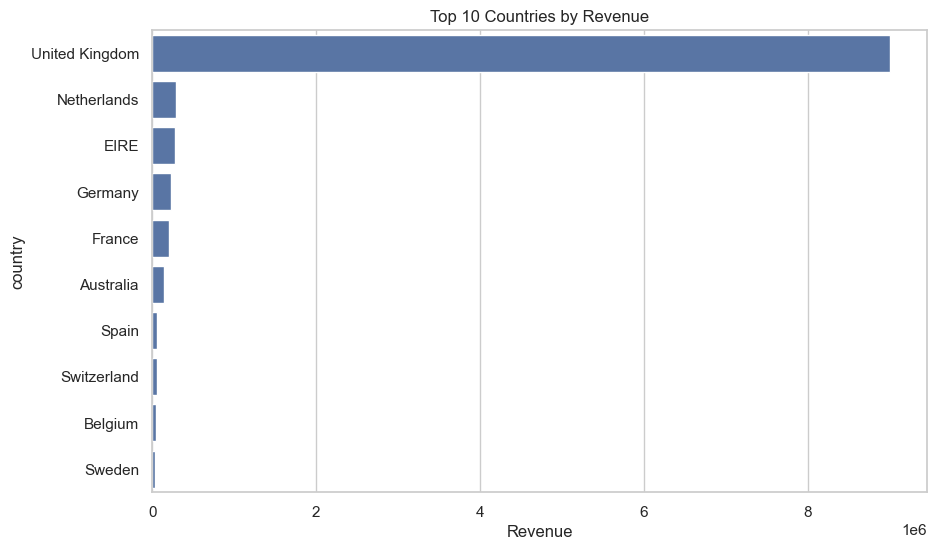

In [12]:
country_rev = df_sales_all.groupby('country')['total_price'].sum().sort_values(ascending=False)
display(country_rev.head(15))

plt.figure(figsize=(10,6))
sns.barplot(x=country_rev.head(10).values, y=country_rev.head(10).index)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Revenue')
plt.show()

## 13) Top products (by revenue and by quantity)

In [13]:
top_products_revenue = df_sales_all.groupby(['stockcode','description'])['total_price'].sum().sort_values(ascending=False).head(20)
top_products_qty = df_sales_all.groupby(['stockcode','description'])['quantity'].sum().sort_values(ascending=False).head(20)

display(top_products_revenue)
display(top_products_qty)

stockcode  description                       
DOT        DOTCOM POSTAGE                        206248.77
22423      REGENCY CAKESTAND 3 TIER              174484.74
23843      PAPER CRAFT , LITTLE BIRDIE           168469.60
85123A     WHITE HANGING HEART T-LIGHT HOLDER    104340.29
47566      PARTY BUNTING                          99504.33
85099B     JUMBO BAG RED RETROSPOT                94340.05
23166      MEDIUM CERAMIC TOP STORAGE JAR         81700.92
M          Manual                                 78110.27
POST       POSTAGE                                78101.88
23084      RABBIT NIGHT LIGHT                     66964.99
22086      PAPER CHAIN KIT 50'S CHRISTMAS         64952.29
84879      ASSORTED COLOUR BIRD ORNAMENT          59094.93
79321      CHILLI LIGHTS                          54117.76
23298      SPOTTY BUNTING                         42548.13
22386      JUMBO BAG PINK POLKADOT                42436.24
21137      BLACK RECORD COVER FRAME               40652.13
22502     

stockcode  description                       
23843      PAPER CRAFT , LITTLE BIRDIE           80995
23166      MEDIUM CERAMIC TOP STORAGE JAR        78033
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
85099B     JUMBO BAG RED RETROSPOT               48478
85123A     WHITE HANGING HEART T-LIGHT HOLDER    37603
22197      POPCORN HOLDER                        36761
84879      ASSORTED COLOUR BIRD ORNAMENT         36461
21212      PACK OF 72 RETROSPOT CAKE CASES       36419
23084      RABBIT NIGHT LIGHT                    30788
22492      MINI PAINT SET VINTAGE                26633
22616      PACK OF 12 LONDON TISSUES             26339
21977      PACK OF 60 PINK PAISLEY CAKE CASES    24854
22178      VICTORIAN GLASS HANGING T-LIGHT       24304
15036      ASSORTED COLOURS SILK FAN             23826
17003      BROCADE RING PURSE                    23056
21915      RED  HARMONICA IN BOX                 21933
22386      JUMBO BAG PINK POLKADOT               21465
22197      SMALL PO

## 14) Numeric correlation analysis

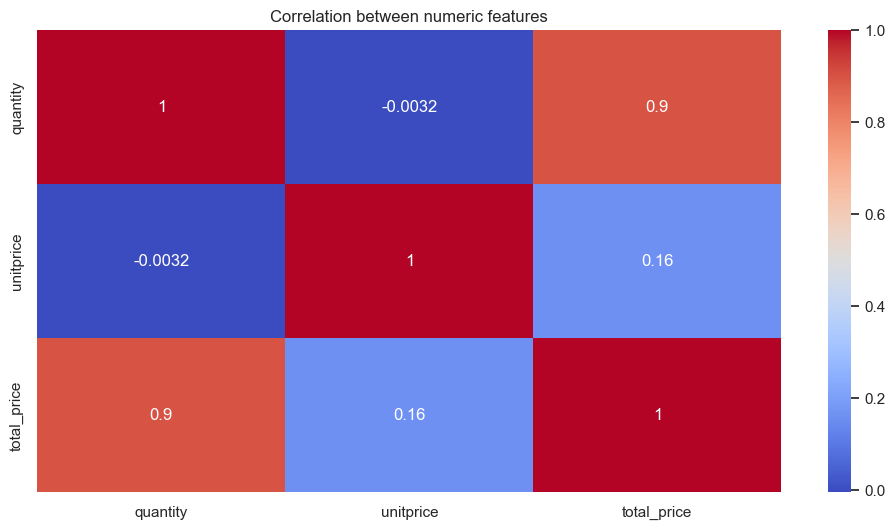

In [14]:
num_cols = ['quantity','unitprice','total_price']
corr = df_sales_all[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between numeric features')
plt.show()

## 15) Outlier detection (IQR method on total_price)

In [15]:
Q1 = df_sales_all['total_price'].quantile(0.25)
Q3 = df_sales_all['total_price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers = df_sales_all[(df_sales_all['total_price'] < lower) | (df_sales_all['total_price'] > upper)]
print('Outliers count:', outliers.shape[0])
outliers.head()

Outliers count: 42653


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,is_cancel,total_price,year,month,month_name,day,hour
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,False,54.08,2010,12,Dec,1,8
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,False,90.00,2010,12,Dec,1,8
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,False,90.00,2010,12,Dec,1,8
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,False,45.00,2010,12,Dec,1,8
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France,False,40.80,2010,12,Dec,1,8


## 16) Top customers by revenue

In [16]:
top_customers = df_sales_cust.groupby('customerid')['total_price'].sum().sort_values(ascending=False).head(10)
top_customers

customerid
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: total_price, dtype: float64

## 17) RFM Analysis (Recency, Frequency, Monetary)

In [17]:
snapshot = df_sales_cust['invoicedate'].max() + pd.Timedelta(days=1)
rfm = df_sales_cust.groupby('customerid').agg({
    'invoicedate': lambda x: (snapshot - x.max()).days,
    'invoiceno': 'nunique',
    'total_price': 'sum'
}).rename(columns={'invoicedate':'recency','invoiceno':'frequency','total_price':'monetary'})

display(rfm.head())

,recency,frequency,monetary
customerid,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


## 18) RFM Scoring and Segmentation

In [18]:
rfm['r_score'] = pd.qcut(rfm['recency'], 5, labels=[5,4,3,2,1])
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['m_score'] = pd.qcut(rfm['monetary'], 5, labels=[1,2,3,4,5])
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

# segmentation function
def rfm_segment(row):
    r,f,m = int(row['r_score']), int(row['f_score']), int(row['m_score'])
    if r >= 4 and f >= 4 and m >= 4:
        return 'VIP'
    if r >= 3 and f >= 3:
        return 'Loyal'
    if r >= 4 and f <= 2:
        return 'New Customer'
    if r <= 2 and f >= 4:
        return 'At Risk'
    if r <= 2 and f <= 2 and m >= 3:
        return 'High Value - At Risk'
    if r == 1 and f == 1:
        return 'Lost'
    return 'Others'

rfm['segment'] = rfm.apply(rfm_segment, axis=1)
rfm['segment'].value_counts()

segment
Others                  1232
Loyal                    998
VIP                      962
New Customer             320
Lost                     310
At Risk                  276
High Value - At Risk     241
Name: count, dtype: int64

## 19) Return rate analysis (by SKU)

In [19]:
df_returns['abs_qty'] = df_returns['quantity'].abs()
return_counts = df_returns.groupby('stockcode')['abs_qty'].sum()
sales_counts = df_sales_pos.groupby('stockcode')['quantity'].sum()
return_rate = (return_counts / sales_counts).dropna().sort_values(ascending=False)
display(return_rate.head(20))

stockcode
79323P    500.750000
79323B    208.875000
84614A    195.000000
84613C    173.000000
35610A    127.700000
22351     107.692308
35609A     51.000000
35610C     44.840000
84743C     42.000000
84613A     38.333333
84569C     37.000000
21839      36.000000
84802B     31.250000
21414      25.000000
22618      24.362319
35650      24.000000
35610B     22.541667
35833G     21.500000
23116      18.461538
84809B     18.000000
dtype: float64

## 20) Hypothesis testing (examples)

In [20]:
# H1: Holiday months have higher revenue
holiday = df_sales_all[df_sales_all['month'].isin([11,12])]['total_price']
non_holiday = df_sales_all[~df_sales_all['month'].isin([11,12])]['total_price']
stat, p = stats.mannwhitneyu(holiday, non_holiday, alternative='greater')
print('H1 p-value:', p)

# H2: UK AOV > Others
uk = df_sales_all[df_sales_all['country']=='United Kingdom']['total_price']
others = df_sales_all[df_sales_all['country']!='United Kingdom']['total_price']
uk_s = uk.sample(30000, random_state=42) if len(uk) > 30000 else uk
others_s = others.sample(30000, random_state=42) if len(others) > 30000 else others
stat2, p2 = stats.mannwhitneyu(uk_s, others_s, alternative='greater')
print('H2 p-value:', p2)


H1 p-value: 1.0
H2 p-value: 1.0


## 21) Data quality issues & limitations

- Missing CustomerID for many rows (affects RFM)
- Negative quantities (returns) require separate handling
- Some SKUs represent postage or are placeholders (POST, DOT)
- Return rates >100% for some SKUs indicate data corrections or quality issues
- Outliers and skewness in price and revenue


## 22) Business recommendations

- Re-engage high-value at-risk customers
- Investigate high-return SKUs and suppliers
- Improve customer data capture
- Optimize inventory around hero SKUs


## 23) Save artifacts (cleaned files)

In [21]:
df_sales_all.to_csv('data/online_retail_sales_all.csv', index=False)
df_sales_cust.to_csv('data/online_retail_sales_customers.csv', index=False)
rfm.reset_index().to_csv('data/rfm_customers.csv', index=False)
return_rate.head(50).to_csv('data/top_return_rates.csv')
print('Saved artifacts to data/')

Saved artifacts to data/
